In [1]:
%matplotlib notebook

In [182]:
#import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import time

#create file path
filename = "../Resources/NoHo_Street_Traffic_Collision_Data_2015_2019_v2.csv"
traffic_df = pd.read_csv(filename, sep=",", parse_dates=['Date Reported', 'Date Occurred', 'Time Occurred'], \
                         infer_datetime_format=['Date Reported', 'Date Occurred','Time Occurred'], low_memory=False)

#Attempting to adjust time entries to float for use
traffic_df['Time Occurred'] = traffic_df['Time Occurred'].astype(str).astype(float)
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13072 entries, 0 to 13071
Data columns (total 9 columns):
DR Number             13072 non-null int64
Date Reported         13072 non-null datetime64[ns]
Date Occurred         13072 non-null datetime64[ns]
Time Occurred         13072 non-null float64
Reporting District    13072 non-null int64
Address               13072 non-null object
Cross Street          12752 non-null object
Location              13072 non-null object
MO Codes              12896 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 919.2+ KB


In [183]:
#Reducing df to necessary elements
traffic_df2 = traffic_df.drop(['Date Reported','Address','Cross Street','Location','MO Codes'],axis =1)
traffic_df2

,DR Number,Date Occurred,Time Occurred,Reporting District
0,151511105,2015-05-08,1.0,1599
1,161504186,2016-01-04,1.0,1599
2,181508642,2018-03-20,1.0,1599
3,151516620,2015-08-08,1.0,1588
4,171520919,2017-10-22,1.0,1599
...,...,...,...,...
13067,151513867,2015-06-25,2359.0,1503
13068,171524199,2017-12-26,2359.0,1504
13069,171521379,2017-10-31,2359.0,1501
13070,151515256,2015-07-22,2359.0,1501


In [184]:
traffic_df2 = traffic_df2.reset_index()
traffic_df2['Week Day'] = traffic_df2['Date Occurred'].dt.dayofweek
traffic_df2

,index,DR Number,Date Occurred,Time Occurred,Reporting District,Week Day
0,0,151511105,2015-05-08,1.0,1599,4
1,1,161504186,2016-01-04,1.0,1599,0
2,2,181508642,2018-03-20,1.0,1599,1
3,3,151516620,2015-08-08,1.0,1588,5
4,4,171520919,2017-10-22,1.0,1599,6
...,...,...,...,...,...,...
13067,13067,151513867,2015-06-25,2359.0,1503,3
13068,13068,171524199,2017-12-26,2359.0,1504,1
13069,13069,171521379,2017-10-31,2359.0,1501,1
13070,13070,151515256,2015-07-22,2359.0,1501,2


In [185]:
# 2015-2019 - CONVERTING TO DATE AND SLICING THE DF BY YEAR
traffic_df2['Date Occurred'] = pd.to_datetime(traffic_df2['Date Occurred'])
yr19 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2019]
yr18 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2018]
yr17 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2017]
yr16 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2016]
yr15 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2015]
yr15

,index,DR Number,Date Occurred,Time Occurred,Reporting District,Week Day
0,0,151511105,2015-05-08,1.0,1599,4
3,3,151516620,2015-08-08,1.0,1588,5
7,7,151512921,2015-06-08,1.0,1591,0
8,8,151523888,2015-12-26,1.0,1591,5
16,16,151523875,2015-12-27,1.0,1557,6
...,...,...,...,...,...,...
13027,13027,151522789,2015-12-05,2355.0,1538,5
13036,13036,151508473,2015-03-17,2355.0,1513,1
13051,13051,151510173,2015-04-20,2359.0,1548,0
13067,13067,151513867,2015-06-25,2359.0,1503,3


In [186]:
# 2015-2019 - ACCIDENTS / DAYS OF THE WEEK
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
yr15_days = yr15['Week Day'].value_counts()
yr16_days = yr16['Week Day'].value_counts()
yr17_days = yr17['Week Day'].value_counts()
yr18_days = yr18['Week Day'].value_counts()
yr19_days = yr19['Week Day'].value_counts()

days_df = pd.DataFrame({'2015': yr15_days,
                        '2016': yr16_days,
                        '2017': yr17_days,
                        '2018': yr18_days,
                        '2019': yr19_days})
days_df.describe()

,2015,2016,2017,2018,2019
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,364.142857,377.428571,386.142857,365.428571,374.285714
std,14.848441,38.561022,43.563856,36.253079,40.002976
min,344.000000,314.000000,306.000000,289.000000,290.000000
25%,356.500000,352.500000,365.500000,363.500000,369.500000
50%,361.000000,395.000000,403.000000,377.000000,389.000000
75%,373.500000,405.500000,416.000000,382.500000,399.000000
max,384.000000,417.000000,431.000000,400.000000,404.000000


In [187]:
# 2015-2019 - CUME # COLLISIONS BY YEAR
yr15_ct = yr15['DR Number'].count()
yr16_ct = yr16['DR Number'].count()
yr17_ct = yr17['DR Number'].count()
yr18_ct = yr18['DR Number'].count()
yr19_ct = yr19['DR Number'].count()
yoy_ct = [yr15_ct, yr16_ct, yr17_ct, yr18_ct, yr19_ct]

#TOTAL # OF COLLISIONS
yoy_ct

[2549, 2642, 2703, 2558, 2620]

In [188]:
# 2015 (COLLISIONS PER MONTH)
Jan15 = yr15[yr15['Date Occurred'].dt.month == 1]
Jan15_cts = len(Jan15)

Feb15 = yr15[yr15['Date Occurred'].dt.month == 2]
Feb15_cts = len(Feb15)

Mar15 = yr15[yr15['Date Occurred'].dt.month == 3]
Mar15_cts = len(Mar15)

Apr15 = yr15[yr15['Date Occurred'].dt.month == 4]
Apr15_cts = len(Apr15)

May15 = yr15[yr15['Date Occurred'].dt.month == 5]
May15_cts = len(May15)

Jun15 = yr15[yr15['Date Occurred'].dt.month == 6]
Jun15_cts = len(Jun15)

Jul15 = yr15[yr15['Date Occurred'].dt.month == 7]
Jul15_cts = len(Jul15)

Aug15 = yr15[yr15['Date Occurred'].dt.month == 8]
Aug15_cts = len(Aug15)

Sep15 = yr15[yr15['Date Occurred'].dt.month == 9]
Sep15_cts = len(Sep15)

Oct15 = yr15[yr15['Date Occurred'].dt.month == 10]
Oct15_cts = len(Oct15)

Nov15 = yr15[yr15['Date Occurred'].dt.month == 11]
Nov15_cts = len(Nov15)

Dec15 = yr15[yr15['Date Occurred'].dt.month == 12]
Dec15_cts = len(Dec15)

mo_data_15 = [Jan15_cts, Feb15_cts, Mar15_cts,
              Apr15_cts, May15_cts, Jun15_cts, 
              Jul15_cts, Aug15_cts, Sep15_cts,
             Oct15_cts, Nov15_cts, Dec15_cts]

In [189]:
# 2016 (COLLISIONS PER MONTH)
Jan16 = yr16[yr16['Date Occurred'].dt.month == 1]
Jan16_cts = len(Jan16)

Feb16 = yr16[yr16['Date Occurred'].dt.month == 2]
Feb16_cts = len(Feb16)

Mar16 = yr16[yr16['Date Occurred'].dt.month == 3]
Mar16_cts = len(Mar16)

Apr16 = yr16[yr16['Date Occurred'].dt.month == 4]
Apr16_cts = len(Apr16)

May16 = yr16[yr16['Date Occurred'].dt.month == 5]
May16_cts = len(May16)

Jun16 = yr16[yr16['Date Occurred'].dt.month == 6]
Jun16_cts = len(Jun16)

Jul16 = yr16[yr16['Date Occurred'].dt.month == 7]
Jul16_cts = len(Jul16)

Aug16 = yr16[yr16['Date Occurred'].dt.month == 8]
Aug16_cts = len(Aug16)

Sep16 = yr16[yr16['Date Occurred'].dt.month == 9]
Sep16_cts = len(Sep16)

Oct16 = yr16[yr16['Date Occurred'].dt.month == 10]
Oct16_cts = len(Oct16)

Nov16 = yr16[yr16['Date Occurred'].dt.month == 11]
Nov16_cts = len(Nov16)

Dec16 = yr16[yr16['Date Occurred'].dt.month == 12]
Dec16_cts = len(Dec16)

mo_data_16 = [Jan16_cts, Feb16_cts, Mar16_cts,
              Apr16_cts, May16_cts, Jun16_cts, 
              Jul16_cts, Aug16_cts, Sep16_cts,
             Oct16_cts, Nov16_cts, Dec16_cts]

In [190]:
# 2017 (COLLISIONS PER MONTH)
Jan17 = yr17[yr17['Date Occurred'].dt.month == 1]
Jan17_cts = len(Jan17)

Feb17 = yr17[yr17['Date Occurred'].dt.month == 2]
Feb17_cts = len(Feb17)

Mar17 = yr17[yr17['Date Occurred'].dt.month == 3]
Mar17_cts = len(Mar17)

Apr17 = yr17[yr17['Date Occurred'].dt.month == 4]
Apr17_cts = len(Apr17)

May17 = yr17[yr17['Date Occurred'].dt.month == 5]
May17_cts = len(May17)

Jun17 = yr17[yr17['Date Occurred'].dt.month == 6]
Jun17_cts = len(Jun17)

Jul17 = yr17[yr17['Date Occurred'].dt.month == 7]
Jul17_cts = len(Jul17)

Aug17 = yr17[yr17['Date Occurred'].dt.month == 8]
Aug17_cts = len(Aug17)

Sep17 = yr17[yr17['Date Occurred'].dt.month == 9]
Sep17_cts = len(Sep17)

Oct17 = yr17[yr17['Date Occurred'].dt.month == 10]
Oct17_cts = len(Oct17)

Nov17 = yr17[yr17['Date Occurred'].dt.month == 11]
Nov17_cts = len(Nov17)

Dec17 = yr17[yr17['Date Occurred'].dt.month == 12]
Dec17_cts = len(Dec17)

mo_data_17 = [Jan17_cts, Feb17_cts, Mar17_cts,
              Apr17_cts, May17_cts, Jun17_cts, 
              Jul17_cts, Aug17_cts, Sep17_cts,
             Oct17_cts, Nov17_cts, Dec17_cts]

In [191]:
# 2018 (COLLISIONS PER MONTH)
Jan18 = yr18[yr18['Date Occurred'].dt.month == 1]
Jan18_cts = len(Jan18)

Feb18 = yr18[yr18['Date Occurred'].dt.month == 2]
Feb18_cts = len(Feb18)

Mar18 = yr18[yr18['Date Occurred'].dt.month == 3]
Mar18_cts = len(Mar18)

Apr18 = yr18[yr18['Date Occurred'].dt.month == 4]
Apr18_cts = len(Apr18)

May18 = yr18[yr18['Date Occurred'].dt.month == 5]
May18_cts = len(May18)

Jun18 = yr18[yr18['Date Occurred'].dt.month == 6]
Jun18_cts = len(Jun18)

Jul18 = yr18[yr18['Date Occurred'].dt.month == 7]
Jul18_cts = len(Jul18)

Aug18 = yr18[yr18['Date Occurred'].dt.month == 8]
Aug18_cts = len(Aug18)

Sep18 = yr18[yr18['Date Occurred'].dt.month == 9]
Sep18_cts = len(Sep18)

Oct18 = yr18[yr18['Date Occurred'].dt.month == 10]
Oct18_cts = len(Oct18)

Nov18 = yr18[yr18['Date Occurred'].dt.month == 11]
Nov18_cts = len(Nov18)

Dec18 = yr18[yr18['Date Occurred'].dt.month == 12]
Dec18_cts = len(Dec18)

mo_data_18 = [Jan18_cts, Feb18_cts, Mar18_cts,
              Apr18_cts, May18_cts, Jun18_cts, 
              Jul18_cts, Aug18_cts, Sep18_cts,
             Oct18_cts, Nov18_cts, Dec18_cts]
mo_data_18

[203, 211, 220, 211, 217, 205, 219, 204, 198, 239, 224, 207]

In [192]:
# 2019 (COLLISIONS PER MONTH)
Jan19 = yr19[yr19['Date Occurred'].dt.month == 1]
Jan19_cts = len(Jan19)

Feb19 = yr19[yr19['Date Occurred'].dt.month == 2]
Feb19_cts = len(Feb19)

Mar19 = yr19[yr19['Date Occurred'].dt.month == 3]
Mar19_cts = len(Mar19)

Apr19 = yr19[yr19['Date Occurred'].dt.month == 4]
Apr19_cts = len(Apr19)

May19 = yr19[yr19['Date Occurred'].dt.month == 5]
May19_cts = len(May19)

Jun19 = yr19[yr19['Date Occurred'].dt.month == 6]
Jun19_cts = len(Jun19)

Jul19 = yr19[yr19['Date Occurred'].dt.month == 7]
Jul19_cts = len(Jul19)

Aug19 = yr19[yr19['Date Occurred'].dt.month == 8]
Aug19_cts = len(Aug19)

Sep19 = yr19[yr19['Date Occurred'].dt.month == 9]
Sep19_cts = len(Sep19)

Oct19 = yr19[yr19['Date Occurred'].dt.month == 10]
Oct19_cts = len(Oct19)

Nov19 = yr19[yr19['Date Occurred'].dt.month == 11]
Nov19_cts = len(Nov19)

Dec19 = yr19[yr19['Date Occurred'].dt.month == 12]
Dec19_cts = len(Dec19)

mo_data_19 = [Jan19_cts, Feb19_cts, Mar19_cts,
              Apr19_cts, May19_cts, Jun19_cts, 
              Jul19_cts, Aug19_cts, Sep19_cts,
             Oct19_cts, Nov19_cts, Dec19_cts]

In [193]:
mdex = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
time_df = pd.DataFrame({
                        '2015': mo_data_15,
                        '2016': mo_data_16,
                        '2017': mo_data_17,
                        '2018': mo_data_18,
                        '2019': mo_data_19
                       },index = mdex)
time_df

,2015,2016,2017,2018,2019
Jan,194,169,239,203,212
Feb,178,216,226,211,203
Mar,197,237,246,220,212
Apr,197,222,210,211,233
May,194,200,248,217,185
Jun,215,245,213,205,208
Jul,211,206,251,219,219
Aug,244,245,193,204,242
Sep,212,225,202,198,240
Oct,242,225,237,239,242


In [194]:
# plt.figure()
yr18 = time_df['2018']
yr19 = time_df['2019']
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
yr19_yr18_df = pd.DataFrame({'2019': yr19,
                             '2018': yr18,
                             '2017': yr17,
                             '2016': yr16,
                             '2015': yr15}, index=months)
yr19_yr18_df_cht = yr19_yr18_df.plot.line()
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, months)
plt.title("Traffic Collisions (count)")
plt.xlabel("Months")
plt.ylabel("No. of Collisions")
plt.grid()
plt.tight_layout()

ValueError: Shape of passed values is (6, 5), indices imply (12, 5)

<IPython.core.display.Javascript object>


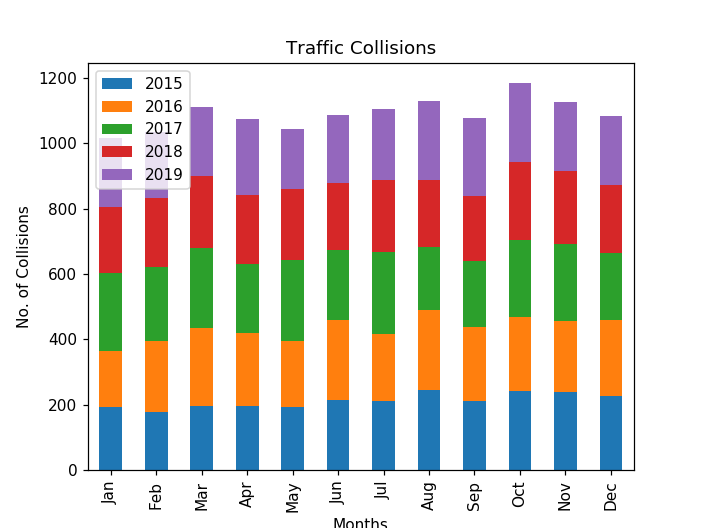

Text(0, 0.5, 'No. of Collisions')

In [201]:
mom_frame = {'2015':mo_data_15,'2016':mo_data_16,'2017':mo_data_17,'2018':mo_data_18,'2019':mo_data_19}
mdex = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mom_ct_df = pd.DataFrame(mom_frame,index=mdex)
mom_ct_df.plot.bar(stacked=True)
plt.title("Traffic Collisions")
plt.xlabel("Months")
plt.ylabel("No. of Collisions")

In [196]:
# # 2015 Statistics
# quartiles = time_df['2015'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [197]:
# # 2016 Statistics
# quartiles = time_df['2016'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [198]:
# # 2017 Statistics
# quartiles = time_df['2017'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [199]:
# # 2018 Statistics
# quartiles = time_df['2018'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [200]:
# # 2019 Statistics
# quartiles = time_df['2019'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")